# Projeto florestas aleatórias

Neste projeto, vamos explorar os dados públicos disponíveis em [LendingClub.com](www.lendingclub.com). O Lending Club conecta pessoas que precisam de dinheiro com pessoas que têm dinheiro (investidores). O investidor, gosta de investir em pessoas que demonstram ter um perfil com uma alta probabilidade de pagar o empréstimo. Vamos tentar criar um modelo que ajude a prever esta situação.

O clube de empréstimo teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016). Vamos verificar alguns dos dados e ter em consideração o contexto.

Iremos utilizar os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se uma determinada pessoa pagou o empréstimo na íntegra.

Análise às colunas do DataSet:
* credit.policy: 1 se o cliente corresponder aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juro do empréstimo (uma taxa de 11% é armazenada como 0,11). Os clientes de risco recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo cliente se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do cliente.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do cliente.
* days.with.cr.line: O número de dias em que o cliente teve uma linha de crédito.
* revol.bal: Saldo rotativo do cliente (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do cliente (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do cliente por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o cliente passou mais de 30 dias num pagamento, nos últimos 2 anos.
* pub.rec: O número de registos públicos depreciativos do cliente (falências, ónus fiscais ou julgamentos).

# Importar bibliotecas

** Importe as bibliotecas base: pandas, numpy, matplotlib e seaborn. **

## Carregar os dados para um DataFrame

** Utilize o pandas para ler o ficheiro "loan_data.csv" para um DataFrame com o nome loans. **

** Use os métodos info(), head(), e describe() em loans. **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análise exploratória de dados 

Vamos efetuar algumas visualizações dos dados! Use seaborn, matplotlib ou pandas.

** Crie um KDE com duas distribuições FICO sobrepostas, uma para cada um dos valores possíveis de credit.policy **.

Text(0.5, 0, 'FICO')

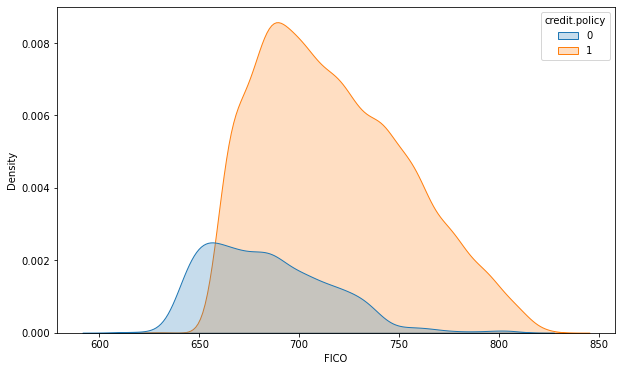

** Crie um KDE semelhante, mas desta vez use a coluna not.fully.paid. **

Text(0.5, 0, 'FICO')

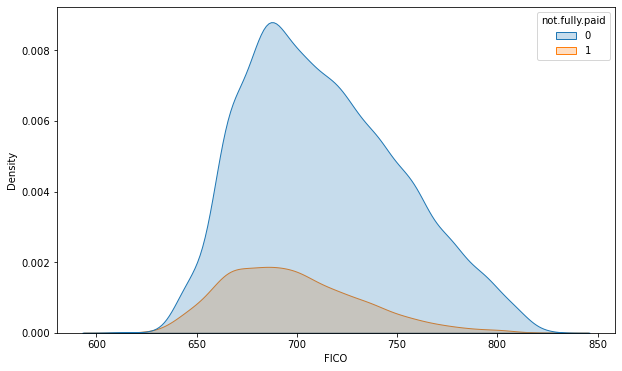

** Crie um countplot com seaborn, que mostre as contagens de empréstimos por finalidade, com o hue definido para not.fully.paid. **

Text(0, 0.5, 'CONTAGEM')

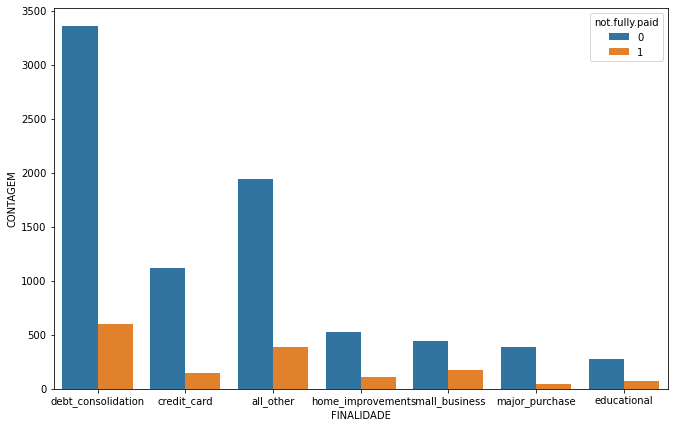

** Visualize a tendência entre o índice FICO e a taxa de juro. Recrie o seguinte Scatter Plot. **

Text(0, 0.5, 'INT.RATE')

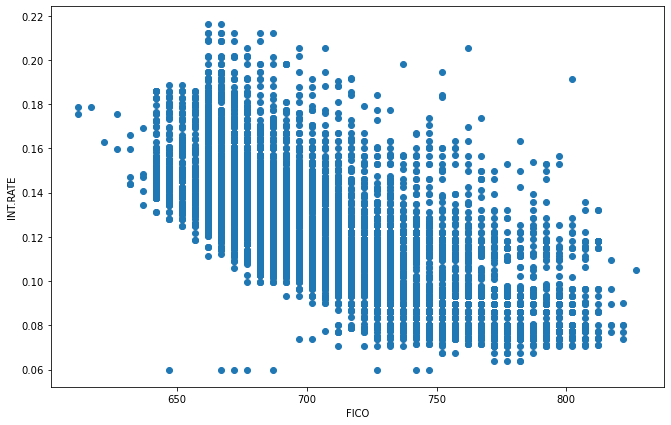

# Configurar os dados

Vamos configurar os dados para o modelo de classificação de florestas aleatórias!

** Verifique loans.info() novamente. **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Recursos categóricos

Observe a coluna ** purpose ** como categórica (Dtype = object)

Significa que é necessário transformar esta coluna, usando variáveis dummys. Utilize pd.get_dummies.




Primeiro passo...

** Crie uma lista de 1 elemento, que contenha a string 'purpose'. Atribua o nome "cat_feats" à lista. **

Segundo passo...

** Use "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um novo DataFrame com as novas colunas de recursos com variáveis dummy. Atribua o nome final_data ao novo DataFrame. **

In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Divisão dos Dados: Treino-Teste

O próximo passo é dividir os dados num conjunto de treino e num conjunto de teste!

** Use sklearn para dividir os dados **

** Use test_size=0.3 e random_state=101 **

## Treinar uma única Árvore de Decisão

Comecemos por treinar uma única árvore de decisão!

** Import DecisionTreeClassifier **

** Crie uma instância de DecisionTreeClassifier() chamada dtree e efetue o FIT com os dados de treino. **

## Previsões e avaliação da árvore de decisão
** Faça previsões do conjunto de teste e crie um relatório de classificação e uma matriz de confusão. **

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1989  442]
 [ 339  104]]


## Treinar o modelo de Florestas Aleatórias

** Crie uma instância da classe RandomForestClassifier e ajuste-a aos dados de treino do passo anterior. **

** Defina uma floresta com 600 árvores **

## Previsões e Avaliação

** Faça previsões do conjunto de teste **

** Crie um relatório de classificação dos resultados**

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



** Mostre a Matriz de Confusão para as previsões. **

[[2423    8]
 [ 435    8]]


** Onde se obtiveram melhores resultados? Com a floresta aleatória ou com a árvore de decisão? **